In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Company Name,Founded,Industry,Job Description,Job Title,Location,Rating,Revenue,Salary Estimate,Sector,...,company_txt,job_region-state,age,python_yn,r_studio_yn,sql_yn,cloud_yn,excel_yn,bigquery_yn,spark_yn
0,Raytheon Missiles & Defense\r\n3.8,2020,Aerospace & Defense,Senior Data Scientist\r\nRaytheon Missiles & D...,"Senior Data Scientist , Advanced Analytics","Andover, MA",3.8,$10+ billion (USD),$123K-$199K (Glassdoor est.),Aerospace & Defense,...,Raytheon Missiles & Defense\r\n,MA,0,1,0,0,1,0,0,0
1,Humana\r\n3.9,1961,Insurance Carriers,Description\r\nDigital Health and Analytics wi...,Data Scientist 2,"Louisville, KY",3.9,$10+ billion (USD),$52K-$95K (Glassdoor est.),Insurance,...,Humana\r\n,KY,59,1,0,1,0,0,0,1
2,AstraZeneca\r\n4.2,1913,Biotech & Pharmaceuticals,Do you have a passion for Science? Would you l...,Scientist - Antibody Drug Conjugates,"Gaithersburg, MD",4.2,$10+ billion (USD),$61K-$123K (Glassdoor est.),Biotech & Pharmaceuticals,...,AstraZeneca\r\n,MD,107,0,0,0,0,0,0,0
3,AstraZeneca\r\n4.2,1913,Biotech & Pharmaceuticals,Research Scientist/ Senior Research Scientist\...,Research Scientist/ Senior Research Scientist,"Gaithersburg, MD",4.2,$10+ billion (USD),$88K-$167K (Glassdoor est.),Biotech & Pharmaceuticals,...,AstraZeneca\r\n,MD,107,0,0,0,0,1,0,0
4,BankUnited\r\n2.9,2009,Banks & Credit Unions,Summary: The FCC Analytics group is responsibl...,FCC Data Scientist,"Miami Lakes, FL",2.9,$10+ billion (USD),$73K-$121K (Glassdoor est.),Finance,...,BankUnited\r\n,FL,11,1,0,1,0,0,0,0


In [4]:
df.columns

Index(['Company Name', 'Founded', 'Industry', 'Job Description', 'Job Title',
       'Location', 'Rating', 'Revenue', 'Salary Estimate', 'Sector', 'Size',
       'Type of ownership', 'hourly', 'currency', 'employer_provided',
       'min_salary', 'max_salary', 'average_salary', 'company_txt',
       'job_region-state', 'age', 'python_yn', 'r_studio_yn', 'sql_yn',
       'cloud_yn', 'excel_yn', 'bigquery_yn', 'spark_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'intern' in title.lower() or 'co-op' in title.lower() or 'coop' in title.lower():
        return 'jr'
    else:
        return 'na'           

## Job title and seniority

In [6]:
df['job_simpl'] = df['Job Title'].apply(title_simplifier)
df['job_simpl'].value_counts()

data scientist    352
na                110
analyst            92
data engineer      68
mle                27
manager             6
director            3
Name: job_simpl, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        493
senior    161
jr          4
Name: seniority, dtype: int64

## Fix State Los Angeles

In [8]:
df['job_region-state'].value_counts()
# As we dont have this issue with out dataset so it is left as is. 

Toronto          107
 CA               65
Vancouver         51
Montreal          45
 MD               32
 VA               27
 NY               21
 TX               20
 MA               16
Calgary           16
Ottawa            15
 DC               13
 UT               12
 FL               11
 GA               10
 NJ               10
 PA                9
 NC                8
 OH                8
 CO                8
Edmonton           8
 WI                7
Mississauga        7
Saint-Laurent      7
 IN                6
Oakville           6
Winnipeg           6
 IL                6
North York         6
 MO                6
                ... 
 KY                3
Quebec             2
Welwyn             2
Dartmouth          2
 AZ                2
Pointe-Claire      2
Laval              2
 ID                2
 MI                2
Burlington         2
Fort St. John      2
Moncton            2
Chatham-Kent       2
Cochin             2
 ME                2
Guelph             1
 KS          

## Job Description Length

In [9]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       4667
1       3555
2       4703
3       5222
4       4843
5       5598
6       6609
7       2949
8       2972
9       4008
10      6252
11      4441
12      2244
13      6118
14      4771
15      4852
16      5673
17      2473
18      2921
19      4945
20      3535
21      3633
22      4972
23      3265
24      5332
25      3334
26      3775
27      3773
28      2277
29      3681
       ...  
628     7581
629     9114
630     6125
631     6283
632    10235
633     4644
634     2920
635     3486
636     7219
637     2711
638     6454
639     1810
640     5114
641     4430
642     3159
643     3522
644     4578
645    15432
646     6974
647     3231
648     3159
649     3522
650     4578
651     3076
652     6974
653     4895
654     3524
655     6283
656     4630
657     6013
Name: desc_len, Length: 658, dtype: int64

## Competitor count

In [10]:
#df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0) 

## hourly to annual

It is based on an assumption that on average there are 2000 hours / annum. 

In [11]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly is 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly is 1 else x.max_salary, axis = 1)

In [12]:
df[df.hourly == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
10,1,36,66
157,1,94,142
182,1,94,142
265,1,30,52
282,1,14,22
297,1,28,40
312,1,14,22


## Converting CAD to US Dollar for fair comparison

Conversion rate @Date 2020-12-20 = 1 CAD = 0.78 US Dollar

In [13]:
df['average_salary'] = df.apply(lambda x: x.average_salary*0.78 if x.currency is 'CAD' else x.average_salary, axis = 1)
df['min_salary'] = df.apply(lambda x: x.min_salary*0.78 if x.currency is 'CAD' else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*0.78 if x.currency is 'CAD' else x.max_salary, axis = 1)


## remove new line from job title

In [14]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\r', '').replace('\n',''))

In [15]:
df['company_txt']

0                         Raytheon Missiles & Defense
1                                              Humana
2                                         AstraZeneca
3                                         AstraZeneca
4                                          BankUnited
5                                                Unum
6                             Farm Credit Mid-America
7      Johns Hopkins Applied Physics Laboratory (APL)
8                                Myriad Genetics, Inc
9                                               GEICO
10                                    Trinity Biotech
11                                      Tivity Health
12                                             Humana
13                          Catalent Pharma Solutions
14                                              GEICO
15                  Intuitive Research and Technology
16                                        Benson Hill
17                                            Enverus
18                          

# Exploratory Data Analysis

In [16]:
df.describe()

,Founded,Rating,hourly,employer_provided,min_salary,max_salary,average_salary,age,python_yn,r_studio_yn,sql_yn,cloud_yn,excel_yn,bigquery_yn,spark_yn,desc_len
count,658.000000,658.000000,658.000000,658.0,658.000000,658.000000,658.000000,658.000000,658.000000,658.00000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,1580.547112,3.505623,0.010638,0.0,74.130699,113.155015,93.340426,33.823708,0.700608,0.00304,0.521277,0.313070,0.541033,0.025836,0.261398,4276.715805
std,793.937477,1.283468,0.102670,0.0,25.868852,39.440806,31.826423,44.560419,0.458340,0.05509,0.499927,0.464095,0.498693,0.158766,0.439731,1897.576678
min,-1.000000,-1.000000,0.000000,0.0,11.000000,22.000000,9.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,145.000000
25%,1892.000000,3.400000,0.000000,0.0,56.000000,85.000000,71.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3080.250000
50%,1983.500000,3.800000,0.000000,0.0,72.000000,107.000000,89.500000,18.000000,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,3980.500000
75%,2005.000000,4.100000,0.000000,0.0,89.000000,136.000000,111.750000,43.000000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000,5168.500000
max,2020.000000,5.000000,1.000000,0.0,155.000000,247.000000,201.000000,352.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,16129.000000


In [17]:
df.columns

Index(['Company Name', 'Founded', 'Industry', 'Job Description', 'Job Title',
       'Location', 'Rating', 'Revenue', 'Salary Estimate', 'Sector', 'Size',
       'Type of ownership', 'hourly', 'currency', 'employer_provided',
       'min_salary', 'max_salary', 'average_salary', 'company_txt',
       'job_region-state', 'age', 'python_yn', 'r_studio_yn', 'sql_yn',
       'cloud_yn', 'excel_yn', 'bigquery_yn', 'spark_yn', 'job_simpl',
       'seniority', 'desc_len'],
      dtype='object')

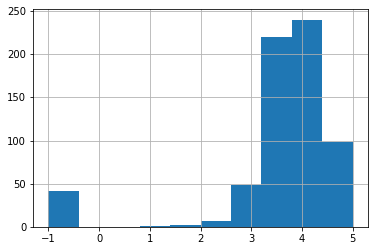

In [18]:
df.Rating.hist()

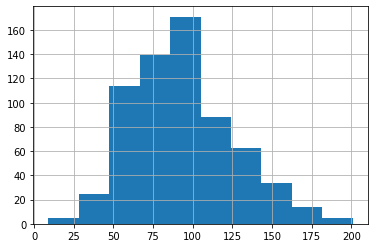

In [19]:
df.average_salary.hist()

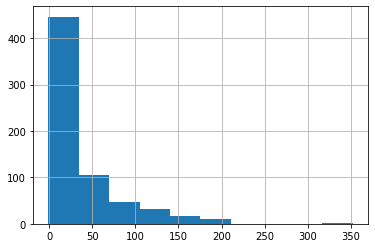

In [20]:
df.age.hist()

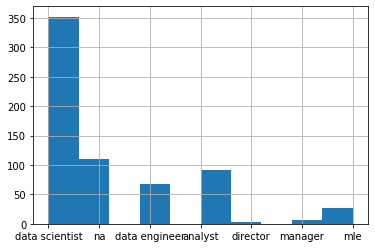

In [21]:
df.job_simpl.hist()

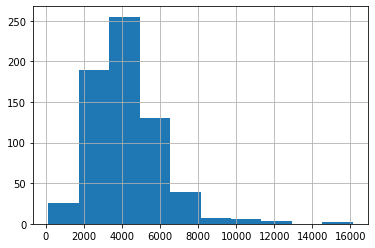

In [22]:
df.desc_len.hist()

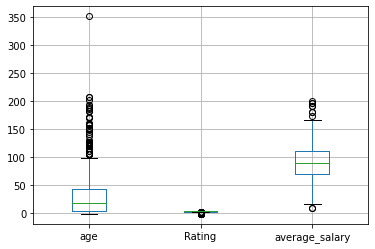

In [23]:
df.boxplot(column = ['age', 'Rating', 'average_salary'])

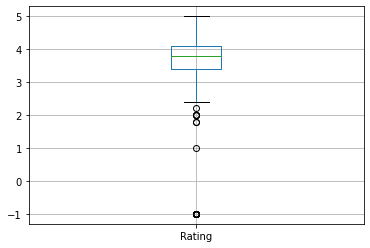

In [24]:
df.boxplot(column = 'Rating')

In [25]:
df.corr()

,Founded,Rating,hourly,employer_provided,min_salary,max_salary,average_salary,age,python_yn,r_studio_yn,sql_yn,cloud_yn,excel_yn,bigquery_yn,spark_yn,desc_len
Founded,1.000000,0.473270,0.015147,NaN,0.192933,0.238867,0.224846,0.343754,0.093107,-0.040406,0.091868,0.113009,-0.004174,0.085367,0.027039,0.069352
Rating,0.473270,1.000000,-0.017781,NaN,0.199349,0.205112,0.209475,0.201475,0.033397,0.010521,0.071808,0.101041,0.015215,0.068752,0.052678,0.051559
hourly,0.015147,-0.017781,1.000000,NaN,-0.119724,-0.115050,-0.211653,0.002074,-0.158627,-0.005726,-0.108206,-0.006117,0.036052,-0.016887,-0.061689,0.104000
employer_provided,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min_salary,0.192933,0.199349,-0.119724,NaN,1.000000,0.860206,0.941996,-0.003379,0.310114,-0.054749,0.172440,0.147328,-0.118047,0.119620,0.178832,-0.046759
max_salary,0.238867,0.205112,-0.115050,NaN,0.860206,1.000000,0.971565,0.050937,0.238494,-0.074472,0.119020,0.127647,-0.121973,0.106067,0.110433,-0.043839
average_salary,0.224846,0.209475,-0.211653,NaN,0.941996,0.971565,1.000000,0.026887,0.288356,-0.067870,0.153751,0.133228,-0.128235,0.115885,0.146763,-0.054522
age,0.343754,0.201475,0.002074,NaN,-0.003379,0.050937,0.026887,1.000000,-0.079646,-0.030783,-0.005434,-0.030447,0.132040,-0.037436,-0.088373,0.176645
python_yn,0.093107,0.033397,-0.158627,NaN,0.310114,0.238494,0.288356,-0.079646,1.000000,0.036095,0.336725,0.212338,-0.056046,0.085541,0.290716,-0.043697
r_studio_yn,-0.040406,0.010521,-0.005726,NaN,-0.054749,-0.074472,-0.067870,-0.030783,0.036095,1.000000,0.052914,0.022257,0.050856,-0.008992,0.029983,0.026770


In [26]:
df[['age', 'Rating', 'average_salary','desc_len','python_yn','sql_yn','cloud_yn']].corr()

,age,Rating,average_salary,desc_len,python_yn,sql_yn,cloud_yn
age,1.000000,0.201475,0.026887,0.176645,-0.079646,-0.005434,-0.030447
Rating,0.201475,1.000000,0.209475,0.051559,0.033397,0.071808,0.101041
average_salary,0.026887,0.209475,1.000000,-0.054522,0.288356,0.153751,0.133228
desc_len,0.176645,0.051559,-0.054522,1.000000,-0.043697,0.014739,0.158398
python_yn,-0.079646,0.033397,0.288356,-0.043697,1.000000,0.336725,0.212338
sql_yn,-0.005434,0.071808,0.153751,0.014739,0.336725,1.000000,0.187735
cloud_yn,-0.030447,0.101041,0.133228,0.158398,0.212338,0.187735,1.000000


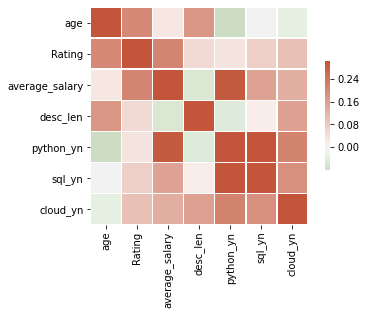

In [27]:
cmap = sns.diverging_palette(120, 20, as_cmap=True)
sns.heatmap(df[['age', 'Rating', 'average_salary','desc_len','python_yn','sql_yn','cloud_yn']].corr(),
            vmax=.3, center = 0, cmap = cmap,
           square = True, linewidth = .5, cbar_kws={'shrink':.5})

#### Categorial Variables

In [28]:
df.columns

Index(['Company Name', 'Founded', 'Industry', 'Job Description', 'Job Title',
       'Location', 'Rating', 'Revenue', 'Salary Estimate', 'Sector', 'Size',
       'Type of ownership', 'hourly', 'currency', 'employer_provided',
       'min_salary', 'max_salary', 'average_salary', 'company_txt',
       'job_region-state', 'age', 'python_yn', 'r_studio_yn', 'sql_yn',
       'cloud_yn', 'excel_yn', 'bigquery_yn', 'spark_yn', 'job_simpl',
       'seniority', 'desc_len'],
      dtype='object')

In [29]:
df_cat = df[['Location', 'Size', 'Type of ownership', 'Industry', 'Sector',
    'Revenue', 'company_txt', 'job_region-state','python_yn', 'r_studio_yn', 'sql_yn',
       'cloud_yn', 'excel_yn', 'bigquery_yn', 'spark_yn', 'job_simpl',
       'seniority']]

graph for Location: total = 182


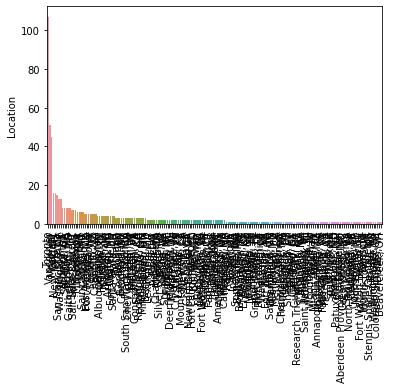

graph for Size: total = 9


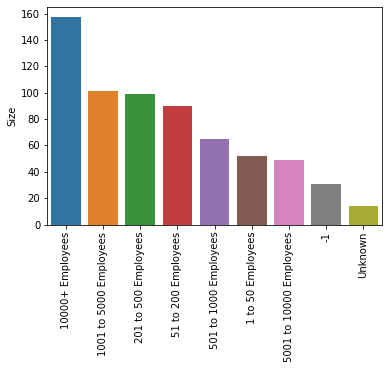

graph for Type of ownership: total = 12


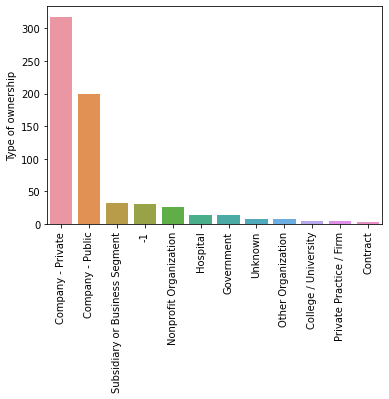

graph for Industry: total = 64


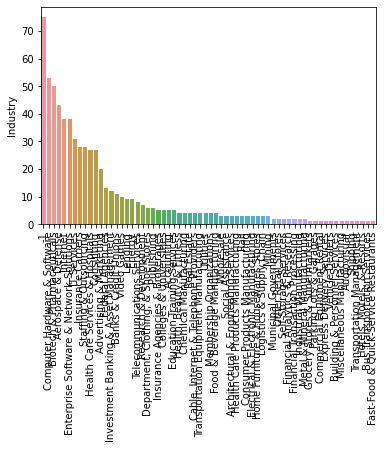

graph for Sector: total = 24


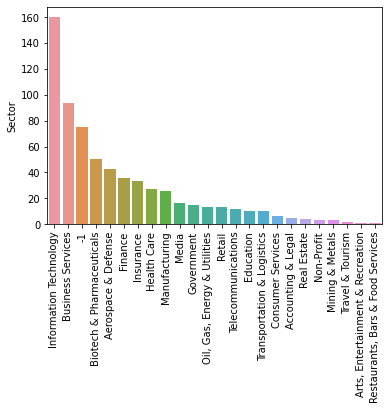

graph for Revenue: total = 14


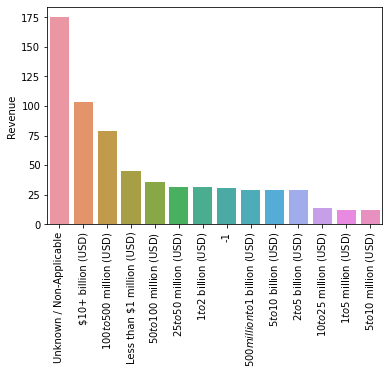

graph for company_txt: total = 439


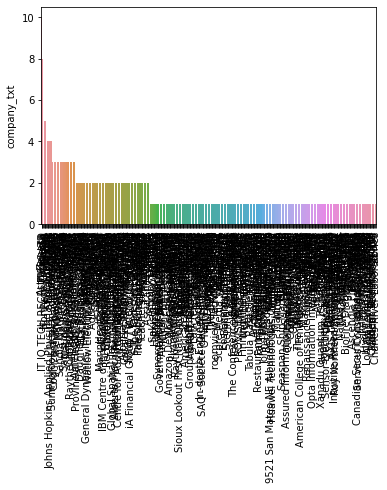

graph for job_region-state: total = 71


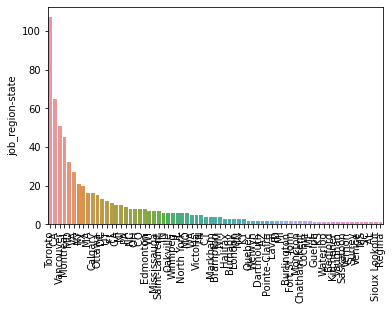

graph for python_yn: total = 2


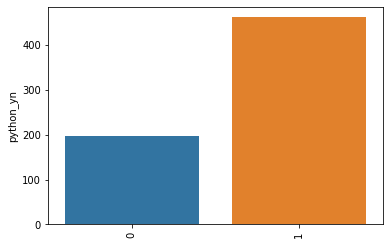

graph for r_studio_yn: total = 2


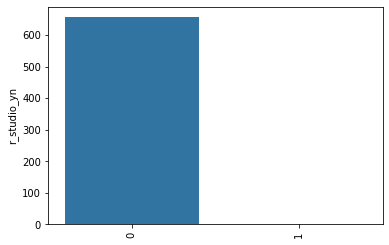

graph for sql_yn: total = 2


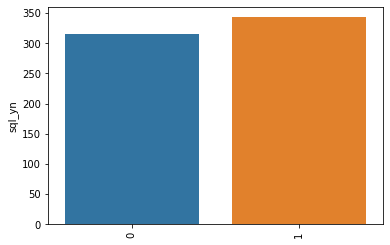

graph for cloud_yn: total = 2


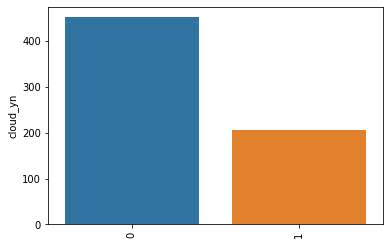

graph for excel_yn: total = 2


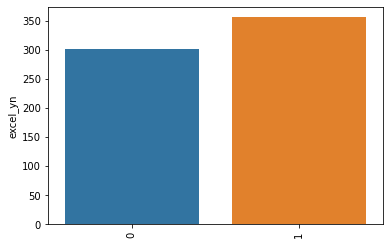

graph for bigquery_yn: total = 2


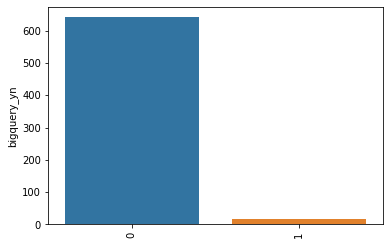

graph for spark_yn: total = 2


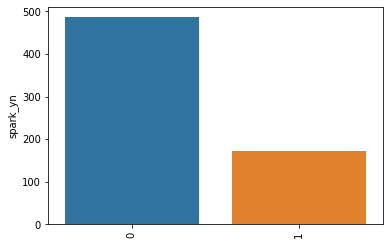

graph for job_simpl: total = 7


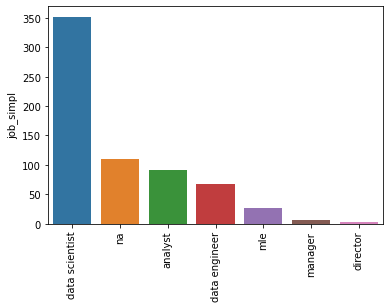

graph for seniority: total = 3


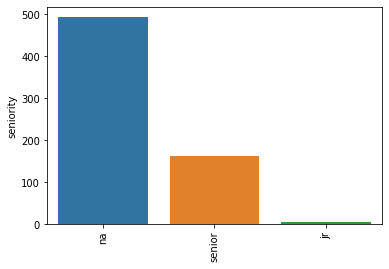

In [30]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

graph for Location: total = 20


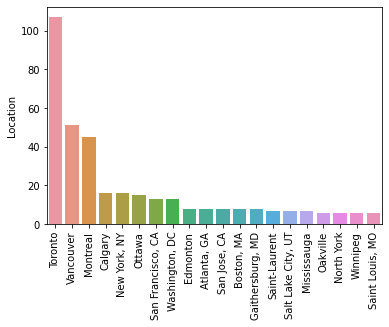

graph for company_txt: total = 20


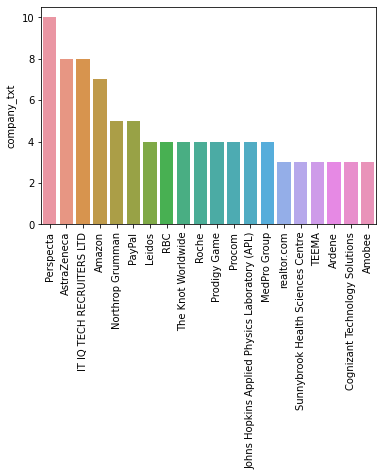

In [31]:
for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

###  Salary vs. various features using pivot tables

In [32]:
df.columns

Index(['Company Name', 'Founded', 'Industry', 'Job Description', 'Job Title',
       'Location', 'Rating', 'Revenue', 'Salary Estimate', 'Sector', 'Size',
       'Type of ownership', 'hourly', 'currency', 'employer_provided',
       'min_salary', 'max_salary', 'average_salary', 'company_txt',
       'job_region-state', 'age', 'python_yn', 'r_studio_yn', 'sql_yn',
       'cloud_yn', 'excel_yn', 'bigquery_yn', 'spark_yn', 'job_simpl',
       'seniority', 'desc_len'],
      dtype='object')

In [33]:
pd.pivot_table(df, index =['job_simpl', 'seniority'], values = 'average_salary')

average_salary
job_simpl      seniority                
analyst        na              60.156977
               senior          83.000000
data engineer  na              90.851852
               senior         103.714286
data scientist jr              53.000000
               na              96.357456
               senior         123.126016
director       na             142.666667
manager        na              89.600000
               senior          50.500000
mle            na              85.166667
na             jr              72.500000
               na              79.050000
               senior          97.852941

In [41]:
pd.pivot_table(df, index =['job_region-state', 'job_simpl'], values = 'average_salary', aggfunc = 'count').sort_values('job_region-state', ascending = False)

average_salary
job_region-state job_simpl                     
Winnipeg         mle                          2
                 data scientist               4
Welwyn           data scientist               2
Waterloo         data scientist               1
Victoria         data scientist               1
                 analyst                      4
Vernon           analyst                      1
Venice           data scientist               1
Vaughan          data scientist               1
Vancouver        na                           6
                 mle                          2
                 data scientist              27
                 data engineer                6
                 analyst                     10
Toronto          manager                      1
                 analyst                     28
                 data scientist              48
                 data engineer               11
                 mle                          9
                 na                          10
Surrey           analyst                      1
Sioux Lookout    analyst                      1
Saskatoon        data scientist               1
Saint-Laurent    na                           2
                 mle                          1
                 analyst                      4
Regina           data scientist               1
Quebec           data scientist               2
Pointe-Claire    data scientist               2
Ottawa           mle                          1
...                                         ...
 KS              na                           1
 IN              na                           1
                 data scientist               1
                 data engineer                1
                 analyst                      3
 IL              data scientist               5
                 analyst                      1
 ID              na                           1
                 data engineer                1
 GA              data scientist               8
                 data engineer                2
 FL              na                           2
                 data scientist               6
                 data engineer                1
                 analyst                      2
 DC              data scientist              11
                 data engineer                1
                 analyst                      1
 CT              na                           3
                 data scientist               1
 CO              na                           2
                 data scientist               6
 CA              director                     1
                 data scientist              40
                 analyst                      1
                 mle                          2
                 na                          18
                 data engineer                3
 AZ              data scientist               2
 AL              na                           1

[161 rows x 1 columns]

In [43]:
pd.pivot_table(df[df.job_simpl == 'data scientist'], index =['job_region-state'], values = 'average_salary').sort_values('average_salary', ascending = False)

,average_salary
job_region-state,
CA,147.475000
NY,140.705882
WA,139.000000
NJ,124.800000
MA,123.208333
IL,120.000000
Cochin,118.000000
VA,116.676471
Venice,116.000000


In [44]:
df.columns

Index(['Company Name', 'Founded', 'Industry', 'Job Description', 'Job Title',
       'Location', 'Rating', 'Revenue', 'Salary Estimate', 'Sector', 'Size',
       'Type of ownership', 'hourly', 'currency', 'employer_provided',
       'min_salary', 'max_salary', 'average_salary', 'company_txt',
       'job_region-state', 'age', 'python_yn', 'r_studio_yn', 'sql_yn',
       'cloud_yn', 'excel_yn', 'bigquery_yn', 'spark_yn', 'job_simpl',
       'seniority', 'desc_len'],
      dtype='object')

In [45]:
# salary X rating, industry, sector, revenue, country, 
#hourly, employer provided, python, r, sql, cloud, excel, 
#bigquery, spark, desc_len, type of ownership

In [50]:
df_pivots = df[['Industry', 'Revenue', 'Rating', 'Sector', 'Size','Type of ownership', 
               'hourly', 'currency','employer_provided', 'job_region-state', 
                'python_yn','r_studio_yn','sql_yn','excel_yn','bigquery_yn', 
                'spark_yn', 'cloud_yn', 'average_salary']]

In [53]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'average_salary').sort_values('average_salary', ascending = False))

Industry
                                         average_salary
Industry                                               
Transportation Equipment Manufacturing       138.250000
Wholesale                                    126.666667
Investment Banking & Asset Management        118.458333
Metal & Mineral Manufacturing                115.000000
Commercial Equipment Rental                  115.000000
Financial Transaction Processing             114.500000
Education Training Services                  113.800000
Enterprise Software & Network Solutions      111.815789
Internet                                     111.144737
Municipal Governments                        109.500000
Advertising & Marketing                      108.475000
Publishing                                   105.666667
Aerospace & Defense                          105.395349
Computer Hardware & Software                 104.301887
Other Retail Stores                          103.000000
Accounting                             

ValueError: Grouper for 'average_salary' not 1-dimensional

In [55]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'average_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),13,19
$1 to $5 million (USD),3,9
$10 to $25 million (USD),6,8
$10+ billion (USD),35,68
$100 to $500 million (USD),16,63
$2 to $5 billion (USD),15,14
$25 to $50 million (USD),9,23
$5 to $10 billion (USD),5,24
$5 to $10 million (USD),6,6


##### Word Cloud with the job desciption


In [58]:
#conda install -c conda-forge wordcloud=1.6.0 

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [61]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    ''' remove punctuation and stop words'''
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color='white', random_state=1,
               stopwords = STOPWORDS, max_words = 2000, width = 800, height = 1500)
wc.generate(text)

plt.figure(figsize = (10,10))
plt.imshow(wc.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')
plt.show()


NameError: name 'image_colors' is not defined

<Figure size 720x720 with 0 Axes>